This is an exploratory data analysis of the Jigsaw Unintended Bias in Toxicity Classification Competition (https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification).

**Goal**:
In the original Toxic Comments Classification Challenge models learnt to predict toxicity based on comments. However, they found that models incorrectly learned to associate the names of frequently attacked identities with toxicity. Models predicted a high likelihood of toxicity for comments containing those identities (e.g. "gay"), even when those comments were not actually toxic (such as "I am a gay woman"). This happens because training data was pulled from available sources where unfortunately, certain identities are overwhelmingly referred to in offensive ways. Training a model from data with these imbalances risks simply mirroring those biases back to users.

In this competition, you're challenged to build a model that recognizes toxicity and minimizes this type of unintended bias with respect to mentions of identities

**Data description**: 
At the end of 2017 the Civil Comments platform shut down and chose make their ~2m public comments from their platform available in a lasting open archive so that researchers could understand and improve civility in online conversations for years to come. Jigsaw sponsored this effort and extended annotation of this data by human raters for various toxic conversational attributes.

In the data supplied for this competition, the text of the individual comment is found in the comment_text column. Each comment in Train has a toxicity label (target), and models should predict the target toxicity for the Test data. This attribute (and all others) are fractional values which represent the fraction of human raters who believed the attribute applied to the given comment. For evaluation, test set examples with target >= 0.5 will be considered to be in the positive class (toxic).

The data also has several additional toxicity subtype attributes. Models do not need to predict these attributes for the competition, they are included as an additional avenue for research.

**Metrics**:
This competition uses a novel metric for evaluation - Details of which are found here: https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/overview/evaluation. Overall the metric penalizes false positives when they are associated with identities

**This notebook provides basic EDA and introduction to the problem**

In [4]:
import pandas as pd
from plotnine import *

In [7]:
train = pd.read_csv('data/data_raw/train.csv')
test = pd.read_csv('data/data_raw/test.csv')

In [8]:
print(train.shape)
train.head()

(1804874, 45)


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [9]:
print(train.columns)

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')


The training data has several additional columns that indicate if comments had identity attributes

In [10]:
print (test.shape)
test.head()

(97320, 2)


,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...


What is the distribution of comment lengths?

C:\Users\light\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 363'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


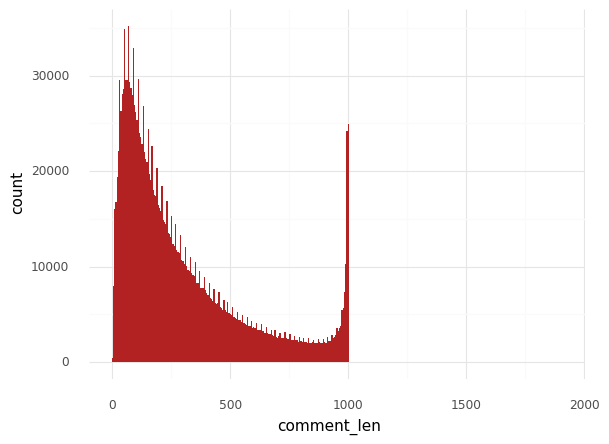

<ggplot: (143553711841)>

In [23]:
train['comment_len']=train['comment_text'].apply(lambda x: len(x))
(ggplot(train, aes(x='comment_len'))+geom_histogram(fill='firebrick')+theme_minimal())

C:\Users\light\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 141'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


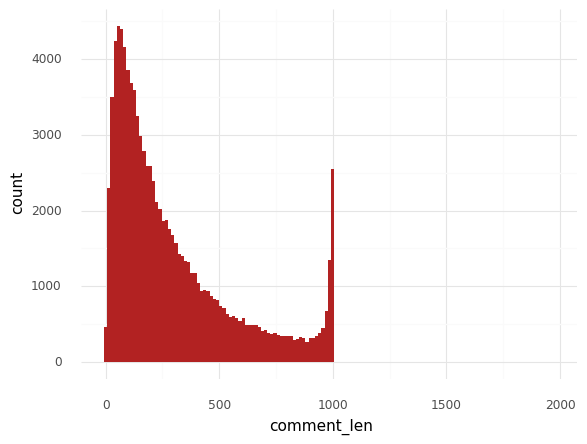

<ggplot: (143650965147)>

In [24]:
test['comment_len'] = test['comment_text'].apply(lambda x: len(x))
(ggplot(test, aes(x='comment_len'))+geom_histogram(fill='firebrick')+theme_minimal())

What is the distribution of targets?

C:\Users\light\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 366'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


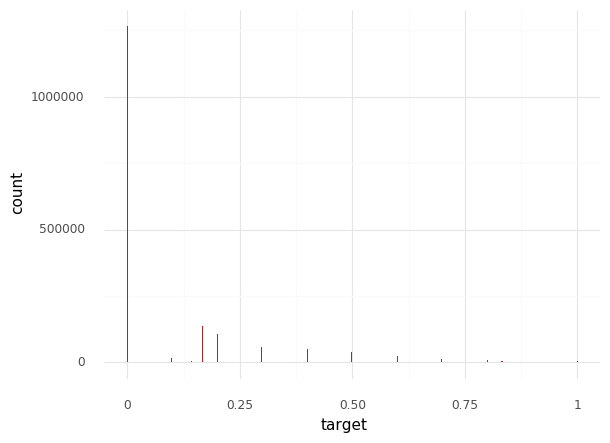

<ggplot: (143553566486)>

In [27]:
(ggplot(train, aes(x='target'))+geom_histogram(fill='firebrick')+theme_minimal())

How common are the identities? Note that only a subset of the identities will be used for evaluation. See details on Kaggle

In [48]:
identity_cols = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']
train_iden=train[identity_cols]

In [49]:
train_iden = train_iden.melt(var_name='identity').dropna(axis=0)
train_iden.head()

,identity,value
4,male,0.0
11,male,0.6
19,male,0.0
20,male,0.0
31,male,0.0


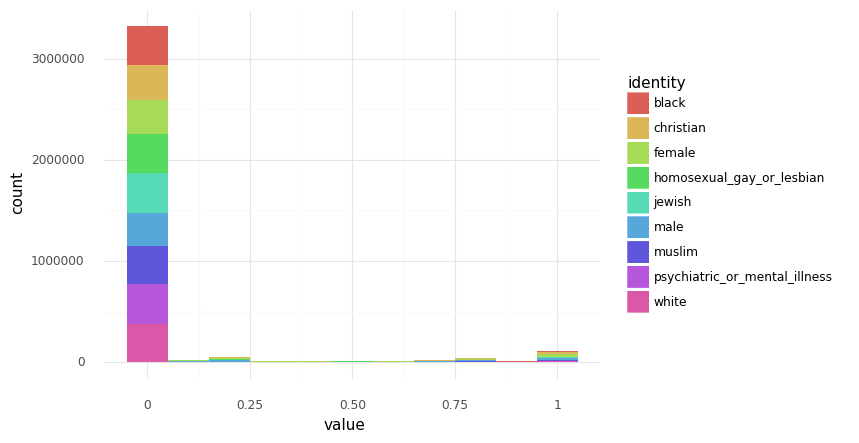

<ggplot: (143650961167)>

In [51]:
(ggplot(train_iden, aes(x='value', fill='identity'))+geom_histogram(binwidth=0.1)+theme_minimal())